# `20180403b` - processing side  - version p

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.interpolate import griddata
import math
from scipy.signal import decimate, convolve

import re
import glob, os

## Creating the set of acquisitions

p_A-130us-0-VGA@0x22-spimode1-64msps.csv
first


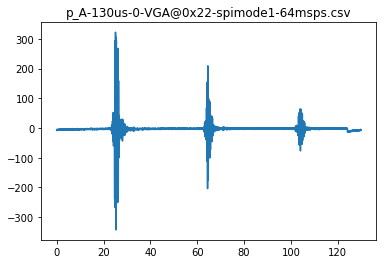

p_A-130us-1-VGA@0x22-spimode1-64msps.csv
first


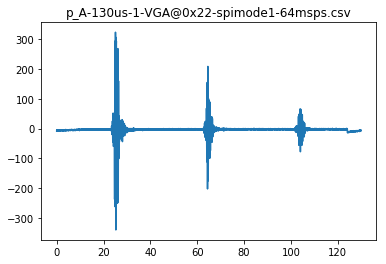

In [8]:
AA = []
lbl = []
IDLine = []

for CSVFile in glob.glob("*.csv"):
    print CSVFile
    A = np.genfromtxt(CSVFile, delimiter=';').astype(int)[1:]
    tmp = [] 
    N = len(A)
    FF = CSVFile.split(".")[0].split("-")[-1]
    lbl.append(  CSVFile.split("-")[2] )
    f = int(re.sub('[^0-9]','', FF))
    #F = int(CSVFile.split(".")[0])

    if (A[4]) > 0b111:
        print "first"
        for i in range(len(A)/2-1):
            value = 128*(A[2*i+0]&0b111) + A[2*i+1] - 512
            IDLine.append((A[2*i+1]&0b11110000)/16) # Identify the # of the line
            tmp.append( value ) 
    else:
        print "second"
        for i in range(len(A)/2-1):
            value = 128*(A[2*i+1]&0b111) + A[2*i+2] - 512
            IDLine.append((A[2*i+1]&0b11110000)/16)
            #print A[2*i]&0b10000000,A[2*i+1]&0b10000000,
            tmp.append( value )
            #print A[2*i+1]
            #print A[i+1]-A[i] 
            
    #t = t*1.0/f
    t = [ 1.0*x/f for x in range(len(tmp))]
    plt.plot(t,tmp)
    plt.title(CSVFile)
    plt.savefig(CSVFile.split(".")[0].split("/")[-1]+".jpg")
    plt.show()
    
    AA.append(tmp)
    


